Text files are very important in anything that relates with computers:

* They are one of the most common ways to store and handle data — both regular text and datasets.
* All code is stored in text.
* Many file formats, like CSV, HTML, and XML are actually text files.

The presence of text files in any data science project is a certainty. For this reason, it is crucial to know how to handle them.

We learnt about less — a terminal pager. With it we are able to inspect the contents of text files. The workflow of using **less** isn't always optimal; sometimes not using a pager is not only more useful, but also necessary.

We'll begin by learning about non-paging alternatives to inspect files.

head example_data.csv will print 10 rows (one for the header, plus nine more data rows). tail will print the last 10 rows excluding header

By default, head and tail will print 10 rows, but we can adjust the number of rows we choose to print by passing it the option -n. Here's an adapted usage message for head:

**head [-n [[-]K]] example_data.csv**

Above, K represents the number of lines we wish to print. To print the first five lines of example_data.csv, we can run head -n 5 example_data.csv

This is the first example we've seen of an **option-argument**. We may have noticed an optional minus sign next to K in the usage message. When included, it will make head print all lines except the last K lines:

A usage message for tail could look like this:

**tail [-n [[+]K]] example_data.csv**

If we want to print all lines except the header, we can run tail -n 15. On the other hand, if we want to print all lines starting from (and including) line 15, we can use the optional + together with K

We've seen that head and tail allow us to see a specific number of lines, but what if we want to see the whole file? One solution is to use head -n and pass the number of lines the file has as a parameter to -n.

If we don't know how many lines the file has, we can either overshoot by guessing and passing in a number to -n larger than the number of lines, or we can find out how many lines a file has.

To do the latter option, we can use the wc utility (word count). We begin by checking what wc is

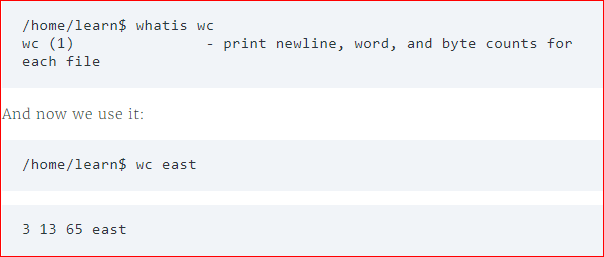

The output tells us that east has three lines (it checks out), 13 words (it checks out) and 65 bytes.

Some observations about the output:

* A newline is determined by the newline character (\n).
* A word is a sequence of characters (with at least one character) delimited by whitespaces (regular spaces, new lines, end of line characters, beginning of line, etc.)
* Depending on the encoding used by the shell and depending on the characters, the byte count may serve as character count. If the file only has ASCII characters, then each character will be a byte and we can use wc to count characters. In the example above, since all characters used are ASCII characters, this means that east has 65 characters. To count characters in the shell's default encoding, we can pass the -m option to wc.

if a filename that contain spaces in its name we can refer to these filenames by quoting the name or by escaping the spaces with a backslash `\`.

It is cumbersome to have to guess/estimate/check the number of lines of a file before displaying its contents. Unsurprisingly, the shell comes to the rescue, this time with the column command.

What it does is print the contents by columns instead of having it be one long list. Let's see it in action.

Instead of showing the whole file in 16 different lines, it divided it into two columns.

A very useful feature of this command is the -t option, which prints the output like a table, making the contents much easier to parse. Let's read from the documentation.

* -s Specify a set of characters to be used to delimit columns for the -t option.

* -t Determine the number of columns the input contains and create a table. Columns are delimited with whitespace, by default, or with the characters supplied using the -s option.  Useful for pretty-printing displays.


As we can see, the default separator of values in the -t option is whitespace. We need to use the -s options to specify a different separator. Here's how we can do this:

/home/learn$ column -s"," -t example_data.csv

Since the values in example_data.csv are separated by commas, we used the option -s with the argument ,, together with -t

Much better!

We should be careful not to use column on very large files because it will consume resources and fill the screen with more data than we humans can visually manage. This is true of any command for which the output is large.

If we accidentally do this, we can press "Ctrl-C" to interrupt the process. This works with most processes, not just with column. To display large files, less is a better option as it will display contents just as needed, and not all at once.

# Shuffle
It's very useful to be able to extract random lines from a file, specially if the file is large. We can do this in the shell with an appropriate use of the shuf command (for shuffle)

The -n option fulfills the use case mentioned in the beginning. Let's use it to extract four random lines of example_data.csv:

/home/learn$ shuf -n 4 example_data.csv

In Python we'd need at least three lines of properly written code to do the same. This isn't to say that the shell is better than Python — far from it — but it can be the most adequate tool in certain situations. We need the right tool for the right job, and that's one of the reasons why we're learning about the command line.

# File type
We may have noticed that most of the files we have used so far do not have an extension, like in Windows.

That's because *nix systems determine what kind of file a file is by peeking into its contents and applying some heuristics (like magic numbers).

This classification of files is different from the one we see in the first character of the output of ls -l.

To figure out what kind of file a file is, we can use the file command. Here's what it looks like.

/home/learn$ file east

east: ASCII text

This tells us that east is a text file that only contains ASCII characters. Let's now see what type of file is the mv command.

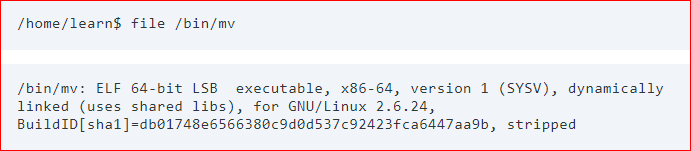

Lots of detail! Ignore them; we're only interested in the part where it says that it is executable. This tells us that /bin/mv is an executable file. This matches what we learned about different types of commands

Question :
    
Run file * to figure out what type of files are in the directory.

Answer:

file *